In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import math

In [3]:
df = pd.read_csv('E:\homeprices.csv')

In [4]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [5]:
df.describe()

,area,bedrooms,age,price
count,5.000000,4.000000,5.00000,5.000000
mean,3280.000000,3.750000,18.20000,616000.000000
std,540.370243,0.957427,8.01249,83919.604384
min,2600.000000,3.000000,8.00000,550000.000000
25%,3000.000000,3.000000,15.00000,565000.000000
50%,3200.000000,3.500000,18.00000,595000.000000
75%,3600.000000,4.250000,20.00000,610000.000000
max,4000.000000,5.000000,30.00000,760000.000000


In [6]:
df.bedrooms.median()

3.5

In [7]:
df['bedrooms'].value_counts

<bound method IndexOpsMixin.value_counts of 0    3.0
1    4.0
2    NaN
3    3.0
4    5.0
Name: bedrooms, dtype: float64>

In [8]:
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

3

In [9]:
df.bedrooms.fillna(median_bedrooms)

0    3.0
1    4.0
2    3.0
3    3.0
4    5.0
Name: bedrooms, dtype: float64

In [10]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


<AxesSubplot:>

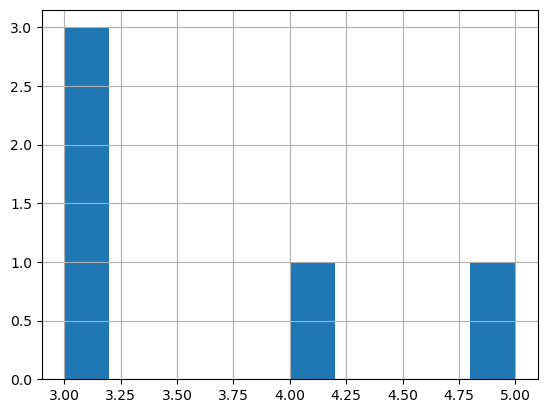

In [19]:
df['bedrooms'].hist(bins = 10)

<AxesSubplot:>

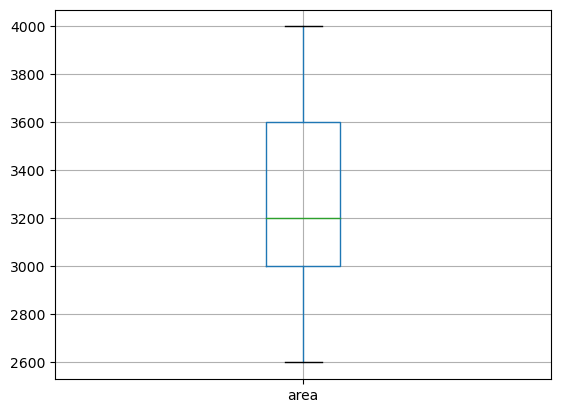

In [20]:
df.boxplot(column='area')

<AxesSubplot:>

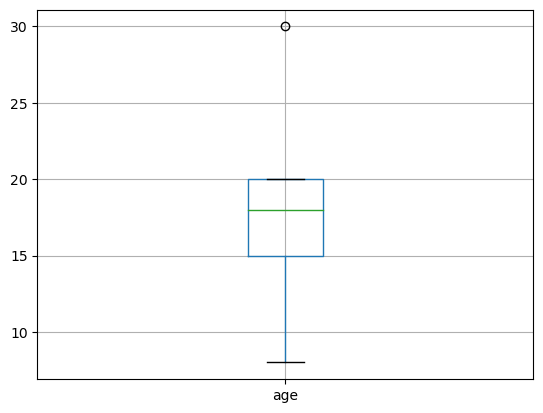

In [21]:
df.boxplot('age')

In [11]:
reg = linear_model.LinearRegression()
reg.fit(df[['area', 'bedrooms', 'age']], df.price)

LinearRegression()

In [12]:
reg.coef_

array([   137.25, -26025.  ,  -6825.  ])

In [13]:
reg.intercept_

383725.0

In [14]:
reg.predict([[3000,3,40]])

C:\Users\stsed\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([444400.])

In [15]:
#how this price was calculated

137.25*3000 + -26025*3 + -6825*40 + 383725.0

444400.0

In [16]:
reg.predict([[2500, 4, 5]])

C:\Users\stsed\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([588625.])

In [17]:
reg.predict([[4000, 5, 4]])

C:\Users\stsed\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([775300.])